In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('IMDB_Top_1000.csv')

In [4]:
df.head()

,Unnamed: 0,Movie_name,Year,Metascore,IMDB_score,Movie_rating,Votes,Domestic_gross,Director,Genres
0,0,The Trial of the Chicago 7,2020,76.0,7.9,R,51023,NaN,Aaron Sorkin,"Drama, History, Thriller"
1,1,Halloween,1978,87.0,7.8,R,229669,47.00,John Carpenter,"Horror, Thriller"
2,2,Tenet,2020,69.0,7.8,PG-13,143111,53.80,Christopher Nolan,"Action, Sci-Fi"
3,3,The Untouchables,1987,79.0,7.9,R,276401,76.27,Brian De Palma,"Crime, Drama, Thriller"
4,4,The Nightmare Before Christmas,1993,82.0,8.0,PG,292915,75.08,Henry Selick,"Animation, Family, Fantasy"


In [4]:
df.isnull().sum()

Unnamed: 0          0
Movie_name          0
Year                0
Metascore         153
IMDB_score          0
Movie_rating       14
Votes               0
Domestic_gross    160
Director            0
Genres              0
dtype: int64

In [ ]:
df.drop(['Metascore', 'Votes'], axis = 1, inplace = True)

In [7]:
#Turning off the options that limits the display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
#Since we had several genres that apply to each movie, we split them by primary and secondary genres
df['Primary_Genre'] = df.Genres.str.split(',', n = 1, expand = True)[0]
df['Secondary_Genre'] = df.Genres.str.split(',', n = 1, expand = True)[1]

In [10]:
#Now we're seeing how many movies are in each genre
df['Primary_Genre'].value_counts()

Drama                   205
Action                  172
Comedy                  144
Crime                   107
Biography                84
Animation                83
Drama                    83
Adventure                72
Comedy                   14
Mystery                  13
Horror                    9
Western                   4
Film-Noir                 3
Fantasy                   2
Family                    2
Horror                    2
Thriller                  1
Name: Primary_Genre, dtype: int64

In [11]:
#creating individual dataframes for each genre to make plotting easier
drama_df = df[(df['Primary_Genre'] == 'Drama')]
action_df = df[(df['Primary_Genre'] == 'Action')]
comedy_df = df[(df['Primary_Genre'] == 'Comedy')]
crime_df = df[(df['Primary_Genre'] == 'Crime')]
bio_df = df[(df['Primary_Genre'] == 'Biography')]

In [12]:
drama_df.head()

,Unnamed: 0,Movie_name,Year,Metascore,IMDB_score,Movie_rating,Votes,Domestic_gross,Director,Genres,Primary_Genre,Secondary_Genre
0,0,The Trial of the Chicago 7,2020,76.0,7.9,R,51023,NaN,Aaron Sorkin,"Drama, History, Thriller",Drama,"History, Thriller"
10,10,The Shining,1980,66.0,8.4,R,882908,44.02,Stanley Kubrick,"Drama, Horror",Drama,Horror
18,18,1917,2019,78.0,8.3,R,387027,159.23,Sam Mendes,"Drama, War",Drama,War
29,29,Rebecca,1940,86.0,8.1,Approved,121733,4.36,Alfred Hitchcock,"Drama, Mystery, Romance",Drama,"Mystery, Romance"
39,39,Little Women,2019,91.0,7.8,PG,130459,108.10,Greta Gerwig,"Drama, Romance",Drama,Romance


In [5]:
df.Domestic_gross.isna().sum()

160

In [7]:
df.shape

(1000, 10)

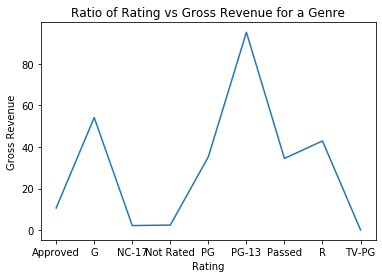

In [15]:
y = drama_df.groupby(['Movie_rating'])['Domestic_gross'].mean()
x = y.index
plt.plot(x,y,label = 'Drama')

plt.title('Ratio of Rating vs Gross Revenue for a Genre')
plt.ylabel('Gross Revenue')
plt.xlabel('Rating')
plt.show()